In [1]:
import networkx as nx
from utility_funcs import readcirclefile, read_nodeadjlist, cost_function
import os
import sklearn.cluster
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [2]:
def readfeaturelist(filename):
    """
    reads a featurelist file and returns a list of the feature names
    """
    with open(filename) as f:
        out = []        # list of feature names
        for line in f:
            out.append(line.strip())
        return sorted(out)

In [3]:
features = readfeaturelist('/Users/jasminele/Downloads/learning-social-circles/featureList.txt')
print( features)
print(len(features))

['birthday', 'education;classes;description', 'education;classes;from;id', 'education;classes;from;name', 'education;classes;id', 'education;classes;name', 'education;classes;with;id', 'education;classes;with;name', 'education;concentration;id', 'education;concentration;name', 'education;degree;id', 'education;degree;name', 'education;school;id', 'education;school;name', 'education;type', 'education;with;id', 'education;with;name', 'education;year;id', 'education;year;name', 'first_name', 'gender', 'hometown;id', 'hometown;name', 'id', 'languages;id', 'languages;name', 'last_name', 'locale', 'location', 'location;id', 'location;name', 'middle_name', 'name', 'political', 'religion', 'work;description', 'work;employer;id', 'work;employer;name', 'work;end_date', 'work;from;id', 'work;from;name', 'work;location;id', 'work;location;name', 'work;position;id', 'work;position;name', 'work;projects;description', 'work;projects;end_date', 'work;projects;from;id', 'work;projects;from;name', 'work

In [4]:
def readfeatures(featurefile):
    """
    reads a featurefile consisting of userid feature;value feature;value
    returns a list where index is user id, elements are dictionaries 
    of features as keys pointing to list of values maybe should be sets
    """
    with open(featurefile) as f:
        out = [] 
        for line in f:
            tokens = line.split()
            profile = {}  # empty profile for the user
            for tok in tokens[1:]:
                feature,val = tok.rsplit(';',1)
                val = int(val)
                if feature not in profile:
                    profile[feature]=set([val])
                else:
                    profile[feature].add(val)
            out.append( profile )
        for i in range(len(out)):
            assert out[i]['id'] == set([i])  # check that each line was read and placed in the correct place in the list
        return out

In [5]:
def convert_profile_dict_to_vector(profile,features):
    out = []
    for feature in features:
        if feature in profile:
            out.append(profile[feature])
        else:
            out.append(set())
    return out

In [6]:
def match_vector(profile1,profile2):
    return [len(x.intersection(y)) for x,y in zip(profile1,profile2)]
     

def generate_feature_matrix(profiles_dict,ego,G):
    return [match_vector(profiles_dict[ego], profiles_dict[g]) for g in G.nodes()]
     

def generate_class_matrix(G,true_circles):
    return dict(zip(true_circles.keys(),[[int(g in circle) for g in G.nodes()] for circle in true_circles.values()]))
     

In [7]:
profiles_dict = readfeatures('features.txt')

profile_matrix = [convert_profile_dict_to_vector(profile,features) for profile in profiles_dict]

In [8]:
import matplotlib.pyplot as plt

Total friends: 265
Training Ego: 345 Circle: 28 ...


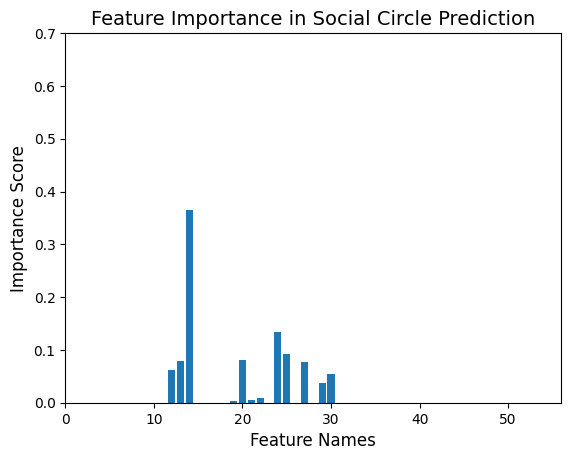

Training Ego: 345 Circle: 29 ...


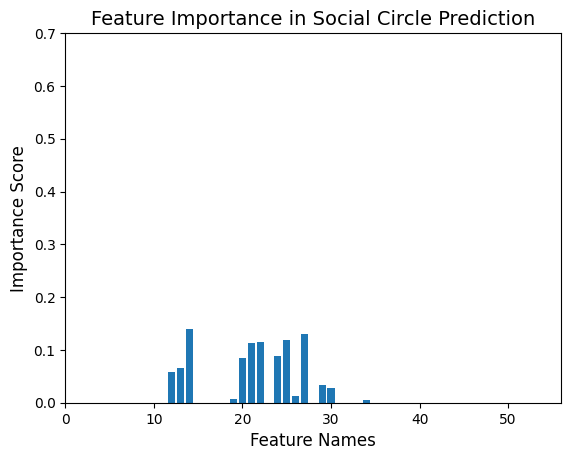

Training Ego: 345 Circle: 22 ...


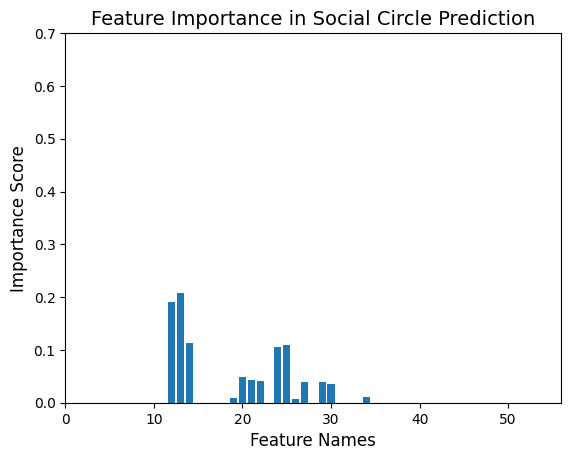

Training Ego: 345 Circle: 20 ...


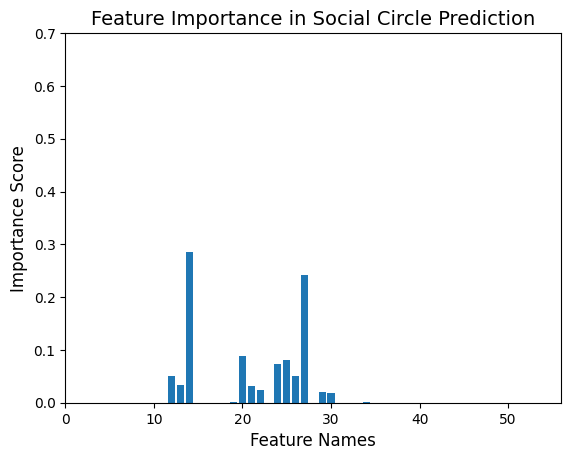

Training Ego: 345 Circle: 26 ...


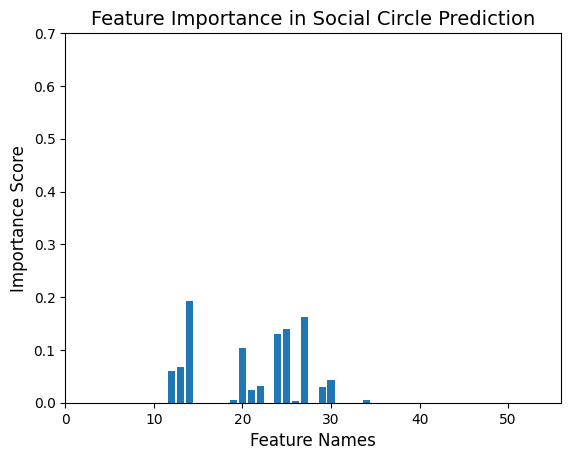

Training Ego: 345 Circle: 27 ...


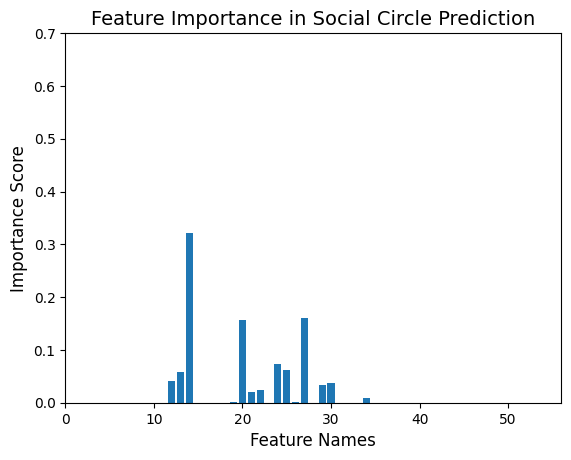

Training Ego: 345 Circle: 24 ...


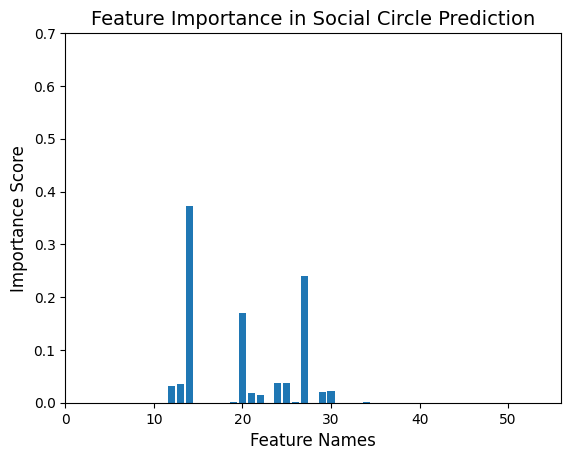

In [9]:
ego = 345
true_circles = readcirclefile('./Training/'+str(ego)+'.circles')
G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')
print('Total friends:', len(G.nodes()))
class_matrix = generate_class_matrix(G,true_circles)
feature_matrix = generate_feature_matrix(profile_matrix,ego,G)

for label,circle in class_matrix.items():
    print('Training Ego:', ego,'Circle:',label,'...')
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit( feature_matrix, circle )
    important_features = sorted(zip(features,forest.feature_importances_), key=lambda x: x[1], reverse=True)
    importance_scores = [val for key,val in important_features]
    importance_labels = [key for key,val in important_features]
    ind = range(len(importance_scores))
    plt.bar(ind, forest.feature_importances_)
    plt.title("Feature Importance in Social Circle Prediction", fontsize=14)
    plt.xlabel("Feature Names", fontsize=12)
    plt.ylabel("Importance Score", fontsize=12)
    plt.axis([min(ind), max(ind), 0, 0.7])
    plt.show()

In [10]:
print("Total number of nodes in Graph 1:", len(G.nodes()))
print("Total number of edges in Graph 1:", len(G.edges()))

Total number of nodes in Graph 1: 265
Total number of edges in Graph 1: 6185


Total friends: 265
Training Ego: 345 Circle: 28 ...


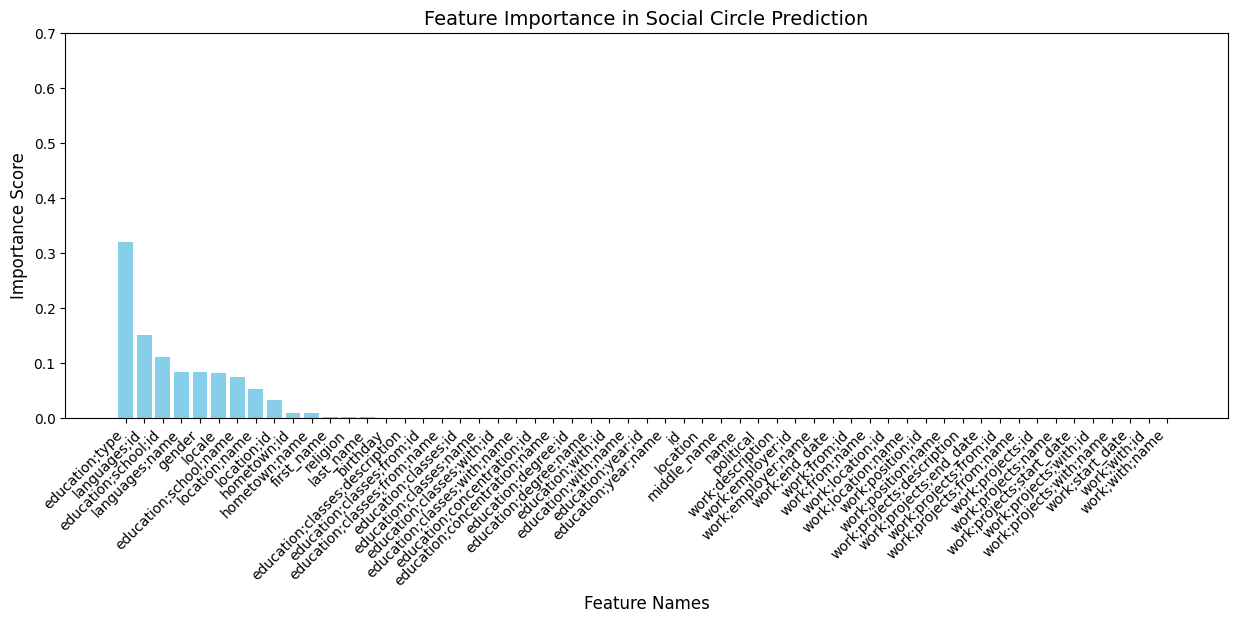

Training Ego: 345 Circle: 29 ...


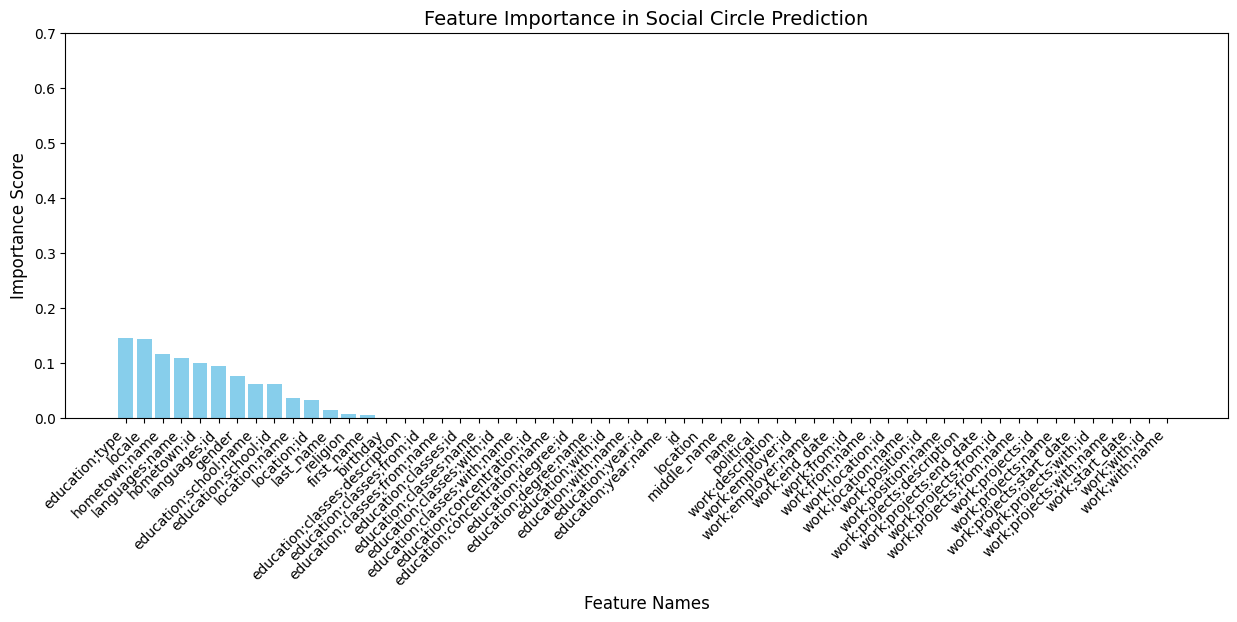

Training Ego: 345 Circle: 22 ...


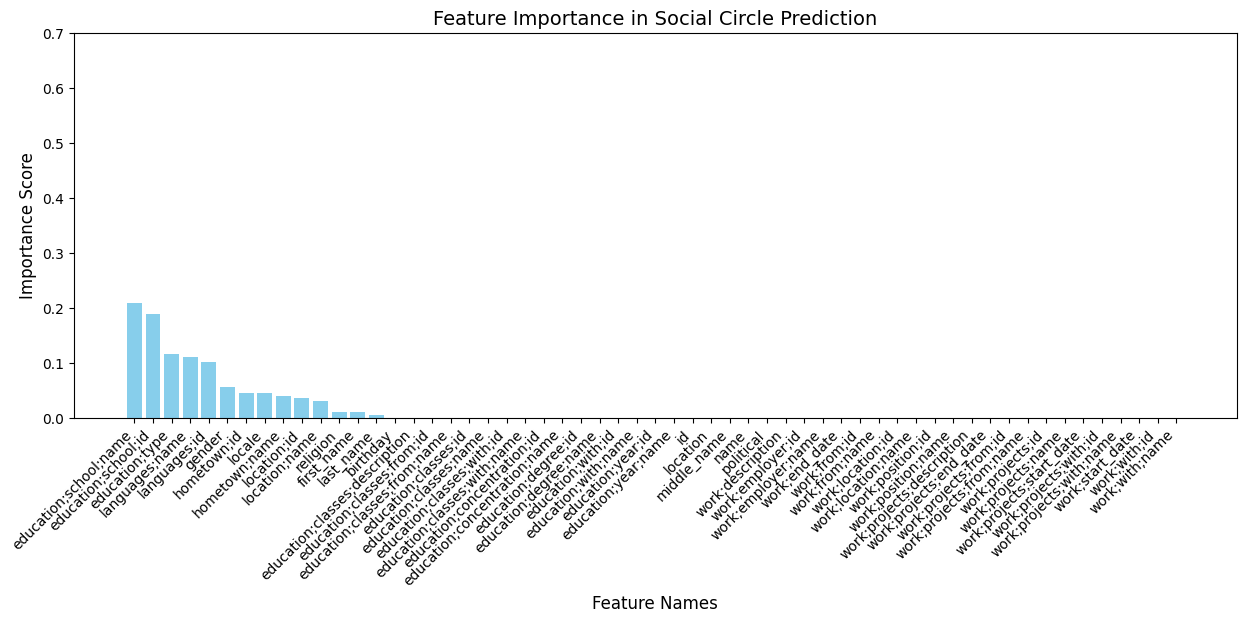

Training Ego: 345 Circle: 20 ...


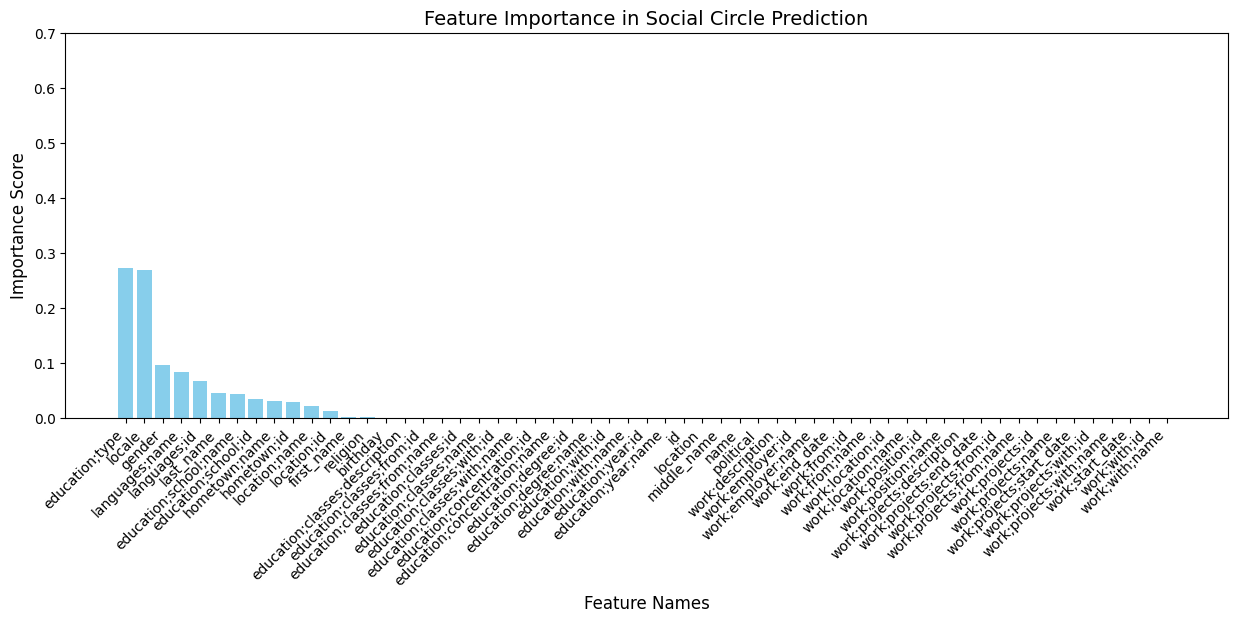

Training Ego: 345 Circle: 26 ...


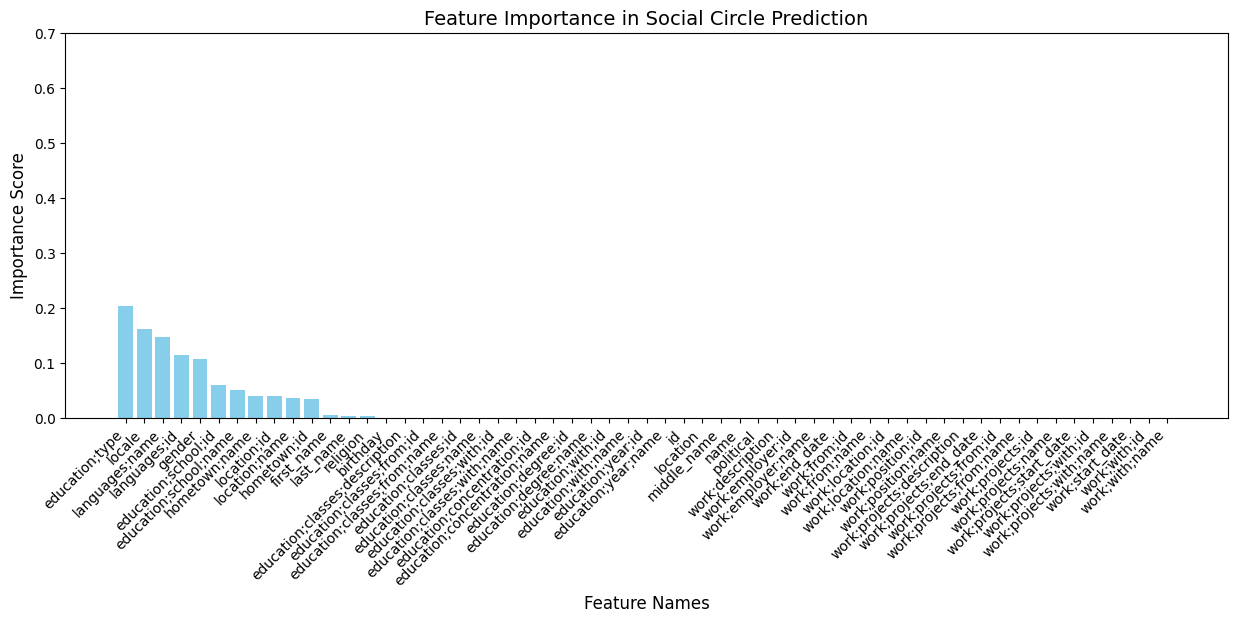

Training Ego: 345 Circle: 27 ...


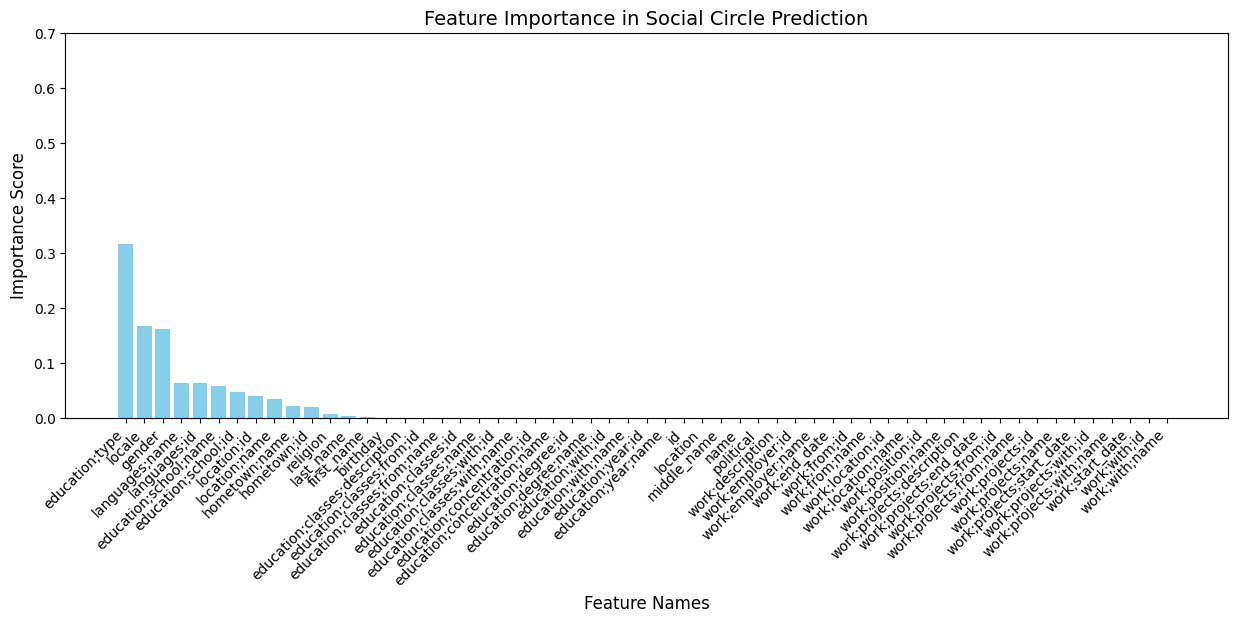

Training Ego: 345 Circle: 24 ...


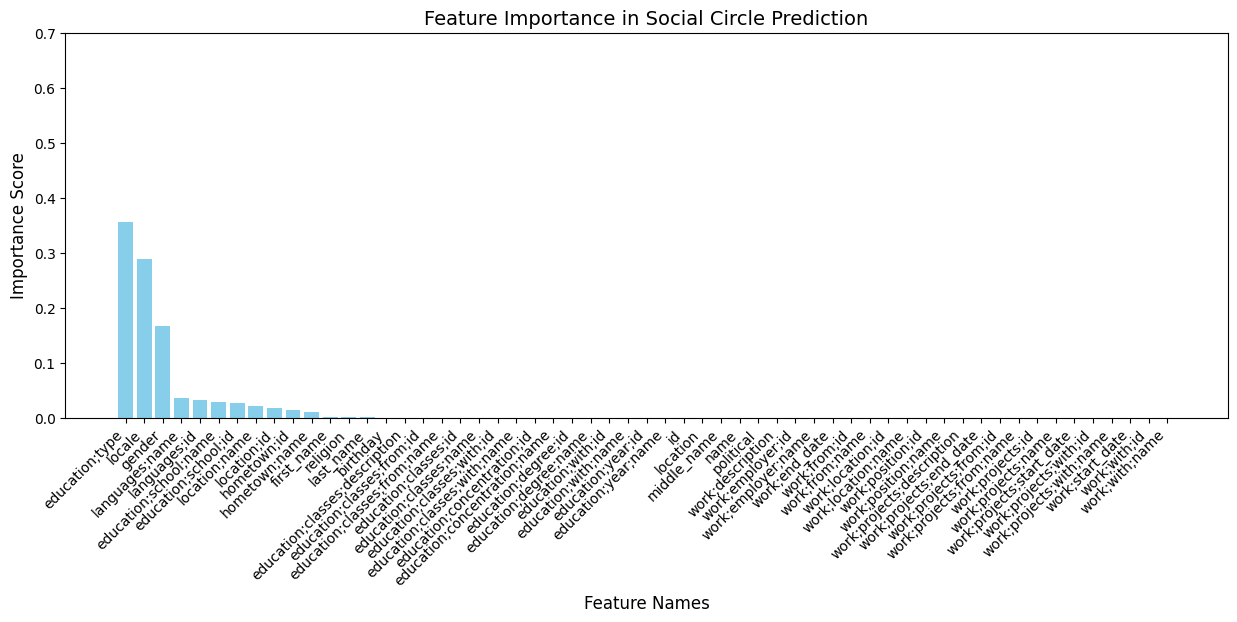

In [11]:
from sklearn.ensemble import RandomForestClassifier

ego = 345
true_circles = readcirclefile('./Training/'+str(ego)+'.circles')
G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')
print('Total friends:', len(G.nodes()))

class_matrix = generate_class_matrix(G, true_circles)
feature_matrix = generate_feature_matrix(profile_matrix, ego, G)

for label, circle in class_matrix.items():
    print('Training Ego:', ego, 'Circle:', label, '...')
    
    # Train the Random Forest Classifier
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit(feature_matrix, circle)

    # Sort features by importance
    important_features = sorted(zip(features, forest.feature_importances_), key=lambda x: x[1], reverse=True)
    importance_scores = [val for key, val in important_features]
    importance_labels = [key for key, val in important_features]  

    ind = range(len(importance_scores))

    plt.figure(figsize=(15,5))  
    plt.bar(ind, importance_scores, color="skyblue")  
    
    plt.title("Feature Importance in Social Circle Prediction", fontsize=14)
    plt.xlabel("Feature Names", fontsize=12)
    plt.ylabel("Importance Score", fontsize=12)

    plt.xticks(ind, importance_labels, rotation=45, ha="right", fontsize=10)

    plt.ylim(0, 0.7)  
    plt.show()

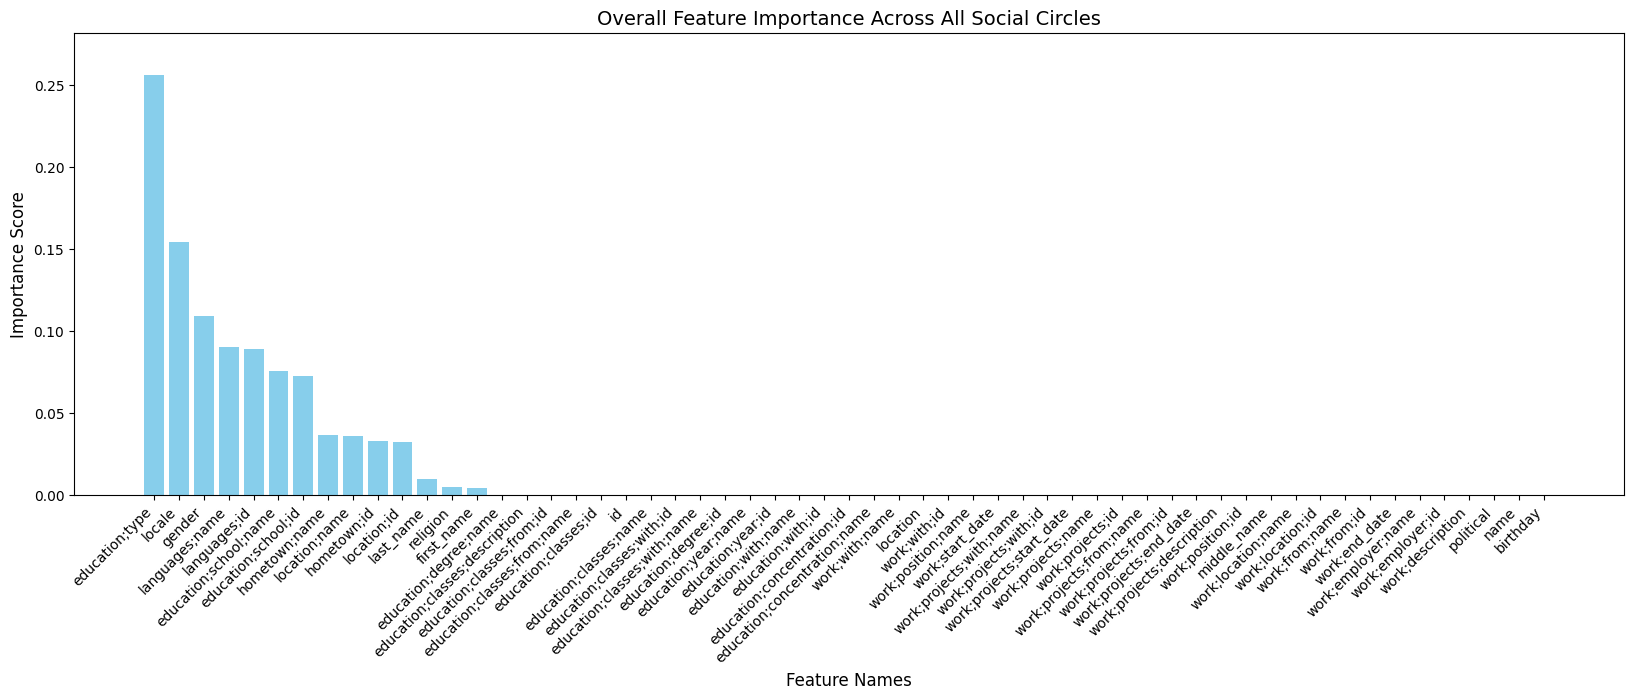

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

ego = 345  # Choose ego user

true_circles = readcirclefile('./Training/'+str(ego)+'.circles')
G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')

class_matrix = generate_class_matrix(G, true_circles)
feature_matrix = generate_feature_matrix(profile_matrix, ego, G)

feature_matrix = np.array(feature_matrix)  # Ensure it's a structured 2D array

num_features = feature_matrix.shape[1]  # Now feature_matrix is an array, so .shape[1] works
feature_importances = np.zeros(num_features)

for label, circle in class_matrix.items():
    circle = np.array(circle)  # Ensure labels are also in NumPy format
    forest = RandomForestClassifier(n_estimators=100)
    forest.fit(feature_matrix, circle)
    feature_importances += forest.feature_importances_  # Add feature importance values

feature_importances /= len(class_matrix)

sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
sorted_importances = feature_importances[sorted_indices]
sorted_labels = np.array(features)[sorted_indices]  # Sort feature names accordingly

plt.figure(figsize=(20, 6))  
plt.bar(sorted_labels, sorted_importances, color="skyblue")

plt.title("Overall Feature Importance Across All Social Circles", fontsize=14)
plt.xlabel("Feature Names", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)

plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate labels for readability
plt.ylim(0, max(sorted_importances) * 1.1)  # Adjust y-axis for visibility

plt.show()

In [13]:
print("Available Circles for Ego:", list(class_matrix.keys()))

Available Circles for Ego: [28, 29, 22, 20, 26, 27, 24]


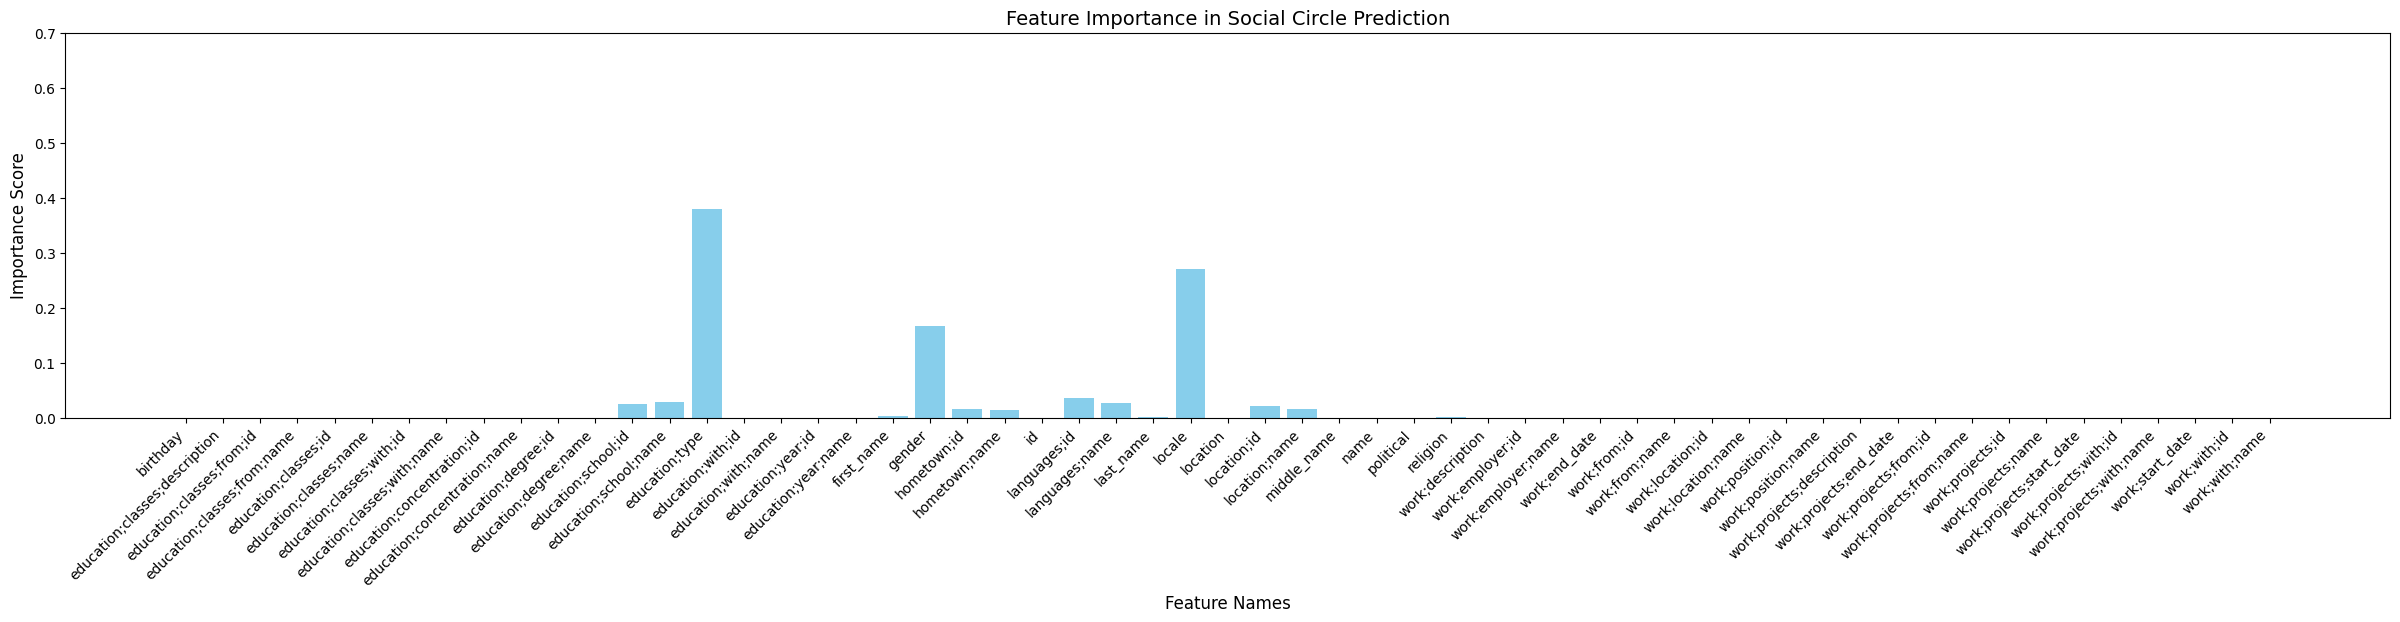

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'forest.feature_importances_' contains feature importance scores
ind = np.arange(len(forest.feature_importances_))  # Indices for bars

plt.figure(figsize=(30,5))  # Set figure size

plt.bar(ind, forest.feature_importances_, color='skyblue')  # Improved color
plt.xticks(ind, features, rotation=45, ha="right", fontsize=10)  

plt.title("Feature Importance in Social Circle Prediction", fontsize=14)
plt.xlabel("Feature Names", fontsize=12)
plt.ylabel("Importance Score", fontsize=12)

plt.ylim(0, 0.7)  # Keep the original axis range

plt.show()

In [15]:
dict(zip(true_circles.keys(),[[int(g in circle) for g in G.nodes()] for circle in true_circles.values()]))


{28: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

Total friends: 265
Training Ego: 345 Circle: 28 ...


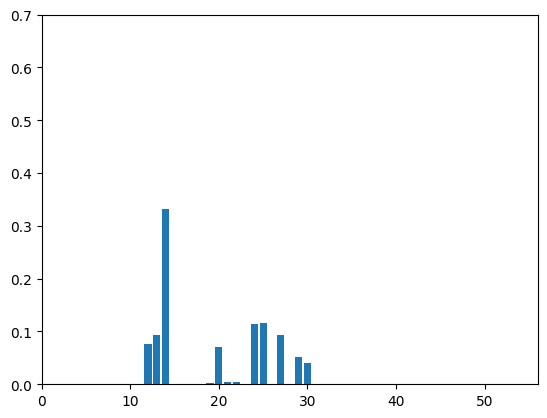

Training Ego: 345 Circle: 29 ...


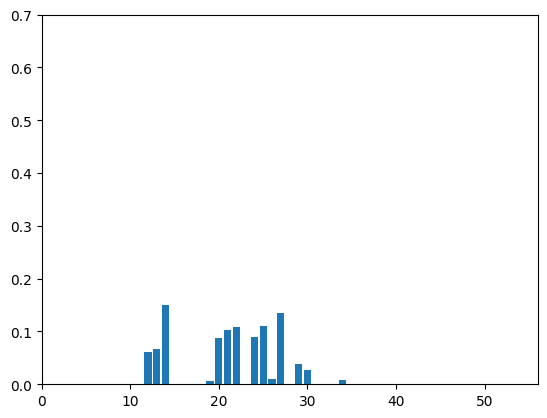

Training Ego: 345 Circle: 22 ...


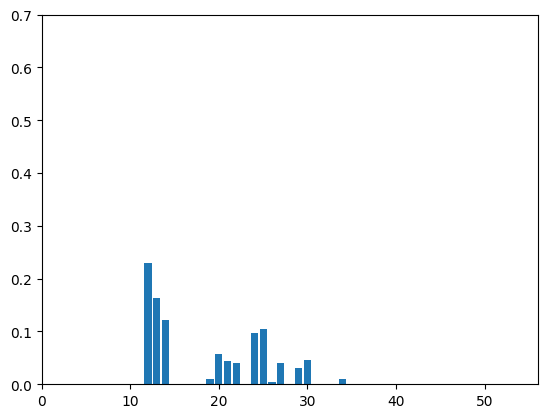

Training Ego: 345 Circle: 20 ...


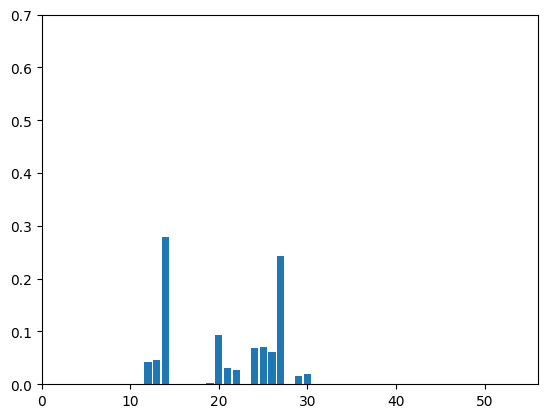

Training Ego: 345 Circle: 26 ...


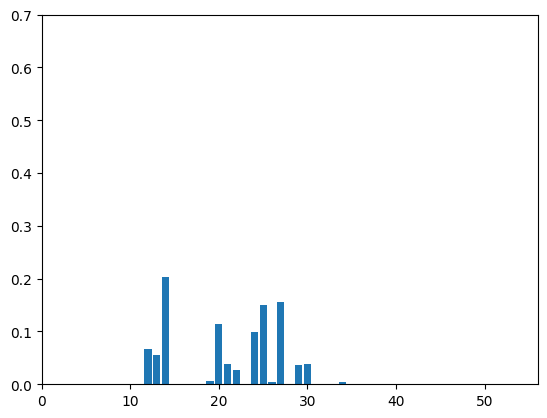

Training Ego: 345 Circle: 27 ...


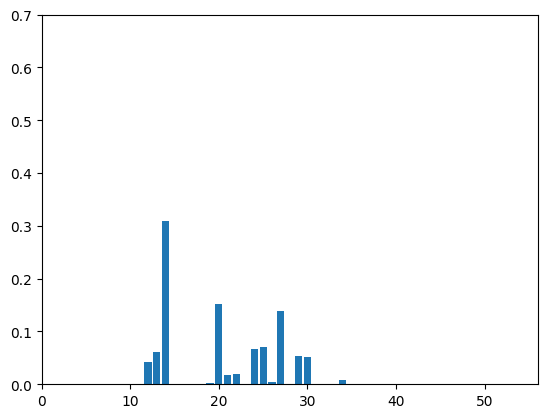

Training Ego: 345 Circle: 24 ...


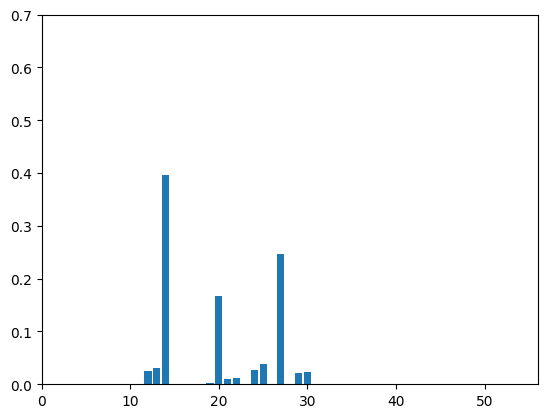

In [16]:
true_circles = readcirclefile('./Training/'+str(ego)+'.circles')
G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')
print('Total friends:', len(G.nodes()))
class_matrix = generate_class_matrix(G,true_circles)
feature_matrix = generate_feature_matrix(profile_matrix,ego,G)

for label,circle in class_matrix.items():
    print('Training Ego:', ego,'Circle:',label,'...')
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit( feature_matrix, circle )
    important_features = sorted(zip(features,forest.feature_importances_), key=lambda x: x[1], reverse=True)
    importance_scores = [val for key,val in important_features]
    importance_labels = [key for key,val in important_features]
    ind = range(len(importance_scores))
    plt.bar(ind, forest.feature_importances_)
    plt.axis([min(ind), max(ind), 0, 0.7])
    plt.show()

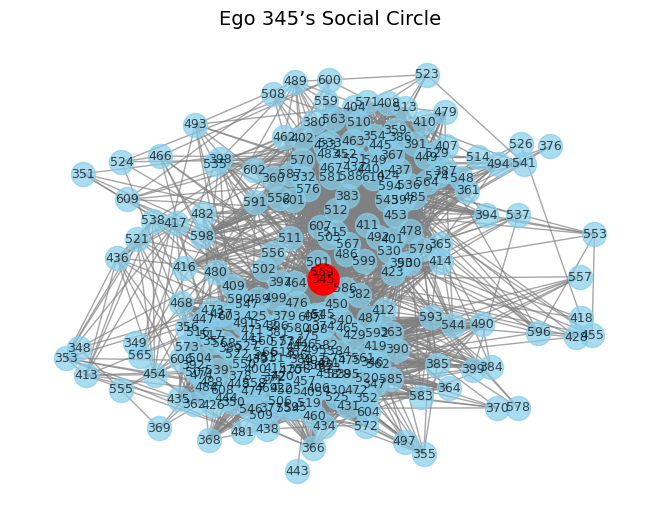

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

ego = 345

G = read_nodeadjlist('./egonets/' + str(ego) + '.egonet')

G.add_node(ego)  # Ensure Ego node exists
for friend in G.nodes():
    G.add_edge(ego, friend)  # Connect ego to all its friends

ego_subgraph = G.subgraph([ego] + list(G.neighbors(ego)))

pos = nx.spring_layout(ego_subgraph, k=0.8)  # k=0.8 spreads out nodes

#plt.figure(figsize=(8, 6))
nx.draw(
    ego_subgraph,
    pos,
    node_size=300,  # Adjusted for visibility
    node_color="skyblue",  # Friend nodes in blue
    edge_color="gray",
    alpha=0.7,  # Light transparency to reduce clutter
    with_labels=True,
    font_size=9
)

nx.draw_networkx_nodes(ego_subgraph, pos, nodelist=[ego], node_size=500, node_color="red")

plt.title("Ego 345’s Social Circle", fontsize=14)
plt.show()

In [18]:
friends = list(G.neighbors(ego))[:10]  # Print only the first 10 friends
print("First 10 friends of Ego 345:", friends)

First 10 friends of Ego 345: [346, 572, 506, 496, 518, 470, 519, 468, 446, 442]


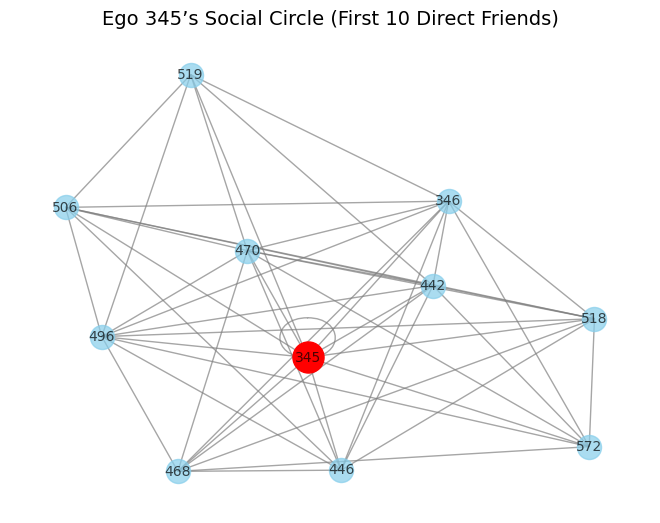

In [19]:
import networkx as nx
import matplotlib.pyplot as plt

ego = 345  # Define the Ego User

G = read_nodeadjlist('./egonets/' + str(ego) + '.egonet')

G.add_node(ego)  # Add ego node if missing
for friend in G.nodes():
    G.add_edge(ego, friend)  # Connect ego to friends

# ONLY 10 direct friends for clarity
selected_friends = list(G.neighbors(ego))[:10]  # First 10 friends
ego_subgraph = G.subgraph([ego] + selected_friends)

pos = nx.spring_layout(ego_subgraph, k=1.2)  # Increase spacing

#plt.figure(figsize=(8, 6))

nx.draw(
    ego_subgraph, 
    pos, 
    node_size=300,  # Medium-sized nodes
    node_color="skyblue",  # Friends in blue
    edge_color="gray",
    alpha=0.7,  
    with_labels=True,  
    font_size=10
)

nx.draw_networkx_nodes(ego_subgraph, pos, nodelist=[ego], node_size=500, node_color="red")

plt.title("Ego 345’s Social Circle (First 10 Direct Friends)", fontsize=14)
plt.show()

In [20]:
trainingfiles = os.listdir('./Training/')

df_labels = ['Ego','Circle']+features
characteristic_profiles = []

for item in trainingfiles:
    ego = int((item.split('.')[0]))
    true_circles = readcirclefile('./Training/'+item)
    G = read_nodeadjlist('./egonets/'+str(ego)+'.egonet')
    class_matrix = generate_class_matrix(G,true_circles)
    feature_matrix = generate_feature_matrix(profile_matrix,ego,G)
    
    for label,circle in class_matrix.items():
        print('Training Ego:', ego,'Circle:',label,'...')
        forest = RandomForestClassifier(n_estimators=100)
        forest = forest.fit( feature_matrix, circle )
        characteristic_profiles.append([ego]+[label]+list(forest.feature_importances_))

df = pd.DataFrame(data=characteristic_profiles,columns=df_labels)

Training Ego: 23299 Circle: 731 ...
Training Ego: 23299 Circle: 281 ...
Training Ego: 23299 Circle: 1319 ...
Training Ego: 23299 Circle: 403 ...
Training Ego: 23299 Circle: 1421 ...
Training Ego: 23299 Circle: 1423 ...
Training Ego: 23299 Circle: 1422 ...
Training Ego: 23299 Circle: 1418 ...
Training Ego: 23299 Circle: 1419 ...
Training Ego: 23299 Circle: 13 ...
Training Ego: 23299 Circle: 1420 ...
Training Ego: 23299 Circle: 1424 ...
Training Ego: 23299 Circle: 205 ...
Training Ego: 23299 Circle: 62 ...
Training Ego: 23299 Circle: 1417 ...
Training Ego: 8553 Circle: 709 ...
Training Ego: 8553 Circle: 710 ...
Training Ego: 8553 Circle: 711 ...
Training Ego: 8553 Circle: 706 ...
Training Ego: 8553 Circle: 707 ...
Training Ego: 8553 Circle: 704 ...
Training Ego: 8553 Circle: 13 ...
Training Ego: 8553 Circle: 708 ...
Training Ego: 8553 Circle: 190 ...
Training Ego: 8553 Circle: 62 ...
Training Ego: 13353 Circle: 925 ...
Training Ego: 13353 Circle: 922 ...
Training Ego: 13353 Circle: 918 .

In [21]:
df

,Ego,Circle,birthday,education;classes;description,education;classes;from;id,education;classes;from;name,education;classes;id,education;classes;name,education;classes;with;id,education;classes;with;name,...,work;projects;from;id,work;projects;from;name,work;projects;id,work;projects;name,work;projects;start_date,work;projects;with;id,work;projects;with;name,work;start_date,work;with;id,work;with;name
0,23299,731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044685,0.0,0.0
1,23299,281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041617,0.0,0.0
2,23299,1319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148407,0.0,0.0
3,23299,403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072256,0.0,0.0
4,23299,1421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089200,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,24857,1464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
588,24857,1467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
589,24857,78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
590,24857,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [22]:
df.mean()

Ego                              12204.152027
Circle                             606.854730
birthday                             0.000714
education;classes;description        0.000000
education;classes;from;id            0.000412
education;classes;from;name          0.000502
education;classes;id                 0.001221
education;classes;name               0.001160
education;classes;with;id            0.000643
education;classes;with;name          0.000624
education;concentration;id           0.009942
education;concentration;name         0.010926
education;degree;id                  0.002345
education;degree;name                0.002386
education;school;id                  0.052846
education;school;name                0.057699
education;type                       0.184466
education;with;id                    0.000265
education;with;name                  0.000238
education;year;id                    0.033041
education;year;name                  0.034393
first_name                        

In [23]:
df.to_csv('characterist_profiles.csv')

In [24]:
df_pos = df[df.min(axis=1)>=0]
df_neg = df[df.min(axis=1)<0]

In [25]:
df_pos_mean = df_pos.mean()
df_pos_mean.sort_values(ascending=False)
rand_chance = (len(df_pos_mean)-2)
df_pos_mean[df_pos_mean.gt(1./(rand_chance))]*rand_chance

Ego                      695636.665541
Circle                    34590.719595
education;school;id           3.012230
education;school;name         3.288870
education;type               10.514562
education;year;id             1.883331
education;year;name           1.960388
gender                        9.865057
hometown;id                   1.570237
hometown;name                 1.561560
last_name                     1.946651
locale                        7.587499
location;id                   1.751708
location;name                 1.757866
work;employer;id              1.077154
work;employer;name            1.487462
work;start_date               1.660295
dtype: float64

In [26]:
df_pos_mean*rand_chance

Ego                              695636.665541
Circle                            34590.719595
birthday                              0.040714
education;classes;description         0.000000
education;classes;from;id             0.023480
education;classes;from;name           0.028599
education;classes;id                  0.069591
education;classes;name                0.066136
education;classes;with;id             0.036668
education;classes;with;name           0.035580
education;concentration;id            0.566698
education;concentration;name          0.622797
education;degree;id                   0.133666
education;degree;name                 0.136026
education;school;id                   3.012230
education;school;name                 3.288870
education;type                       10.514562
education;with;id                     0.015084
education;with;name                   0.013541
education;year;id                     1.883331
education;year;name                   1.960388
first_name   

In [27]:
df_pos.mean()[2:]

birthday                         0.000714
education;classes;description    0.000000
education;classes;from;id        0.000412
education;classes;from;name      0.000502
education;classes;id             0.001221
education;classes;name           0.001160
education;classes;with;id        0.000643
education;classes;with;name      0.000624
education;concentration;id       0.009942
education;concentration;name     0.010926
education;degree;id              0.002345
education;degree;name            0.002386
education;school;id              0.052846
education;school;name            0.057699
education;type                   0.184466
education;with;id                0.000265
education;with;name              0.000238
education;year;id                0.033041
education;year;name              0.034393
first_name                       0.010428
gender                           0.173071
hometown;id                      0.027548
hometown;name                    0.027396
id                               0